**LAB 08: REFORCEMENT LEARNING**

1. Tìm hiểu về OpenAI
2. Chơi thử trò SmartCar
3. Làm quen với Naive và Q-Learning


* OpenAI là 1 công cụ được tạo ra nhằm giúp những nhà nghiên cứu dễ dàng hơn trong việc có 1 benchmark tốt bằng cách tạo một môi trường ổn định, có cách cài đặt đơn giản. Mục đích của công cụ này là giúp tăng khả năng reproduce lại các kết quả trong lĩnh vực AI, cũng như cung cấp 1 công cụ giúp chúng ta dễ dàng thao tác với các môi trường AI hơn. 


In [4]:
!sudo apt update && sudo apt install xvfb

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state infor

In [5]:
#Cài đặt thư viện 
!pip install gym-notebook-wrapper pygame -q

Chúng ta sẽ nói về một environment đơn giản, có số state và số action hữu hạn (và khá nhỏ) là Taxi-v2. Trong environment này, agent của chúng ta đóng vai trò 1 tài xế taxi. Có 4 địa điểm cố định khác nhau trên bản đồ (được ký hiệu R, G, Y, B), và mỗi khi environment bắt đầu, sẽ có 2 điểm bất kỳ là điểm đón và trả khách (2 điểm này có thể trùng nhau), cũng như vị trí của taxi cũng là vị trí bất kỳ. Nhiệm vụ của chúng ta là đón hành khách (ở điểm màu xanh da trời) và trả khách (ở điểm màu tím).

Agent của chúng ta có thể thực hiện 6 actions:

0: xuống dưới

1: lên trên

2: sang trái

3: sang phải

4: đón khách

5: trả khách

Reward của environment này được tính như sau:

cứ sau 1 time step (tức là khi xảy ra bất kỳ action nào), sẽ nhận -1 reward
nhận được +20 reward nếu ta trả khách thành công (nghĩa là time step đó ta sẽ nhận +19 reward)
nếu agent có hành vi đón khách và trả khách không hợp lệ, nhận -10 reward (nghĩa là time step đó ta sẽ nhận -11 reward).

taxi sẽ hoạt động trên một khu vực 5x5, với 4 điểm trả khác và 5 địa điểm hành khách đang đứng nên số states sẽ là 5x5x5x4=500

In [6]:
import numpy as np
import gym
import time
from IPython.display import clear_output
import gnwrapper
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


186

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


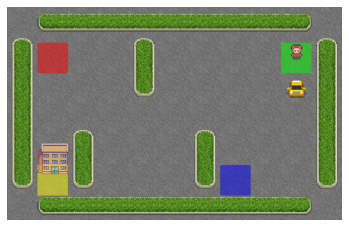

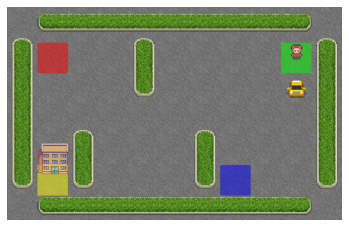

In [7]:
env.env.s = env.encode(1, 1, 2 ,0)
env.render()

Hành khách có thể ở 5 điểm là R, G, Y, B và trong xe, màu xanh dương để chỉ địa điểm hành khách đang đứng chờ (nếu hành khác trong taxi thì xe sẽ màu xanh lá), màu tím để chỉ địa điểm cần chở khách đến

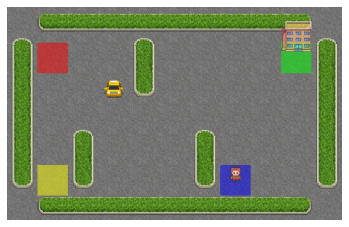

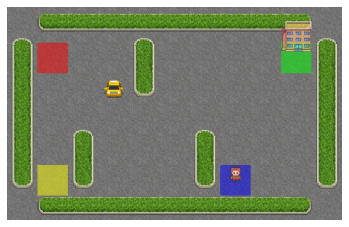

In [8]:
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

env.env.s = env.encode(1 ,1 ,4 ,0)
env.render()

ta sẽ dùng env.encode(số_hàng,số_cột,hành_khách,điểm_trả_khách), với:
* số_hàng thuộc [0,1,2,3,4]
* số_cột thuộc  [0,1,2,3,4]
* hành_khách: 0 là ở R, 1 là ở G, 2 là ở Y, 3 là ở B, 4 là trên xe
* điểm_trả_khách: 0 là ở R, 1 là ở G, 2 là ở Y, 3 là ở B

#Naive-Learning

Bây giờ ta sẽ học Q-table một cách ngây thơ :

* Chọn hành động tốt nhất dựa vào những gì đã học
* Nếu điểm bằng nhau thì chọn ngẫu nhiên
* Q-table cập nhất với discount = 0 (không xem xét tương lai)


Đầu tiên ta phải tạo ra một q-table là ma trận $size\_state\times size\_action$

In [9]:
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

93

In [11]:
state_size = env.observation_space.n # số states
action_size = env.action_space.n # số actions
q_table=np.zeros((state_size,action_size))

FILE_SAVE = "q_table.npy" # định nghĩa file để lưu q_table
total_episodes= 100 # tổng số episodes
total_test_episodes = 100     # tổng số episodes để test
max_steps = 99                # số steps để dừng cho 1 episode

In [ ]:
import time
for episode in range(total_episodes):
    state = env.reset()   # reset lại môi trường
    done = False          # đã hoàn thành trả khách hay chưa
    for step in range(max_steps):
        clear_output(wait=True)
        print("episode: ",episode)
        if  np.max(q_table[state]) ==0:         # nếu trong state q_value đều bằng 0 thì chọn đại 1 action
            action=np.random.randint(0,action_size)
        else:
            action = np.argmax(q_table[state])  # chọn action có q_value lớn nhất

        new_state, reward, done, _ = env.step(action)   # thực hiện hành động để nhận reward và state, action mới

        q_table[state,action] += reward # cập nhật q_table
        state = new_state
        if done:       # nếu taxi có hành vi trả khách thì kết thúc episode
            break

episode:  99


In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_Naive ,q_table)

In [ ]:
# từ q_table bắt đầu chơi thử

env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

q_table=np.load("q_table_naive.npy")
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    

    for step in range(max_steps):
        print("****************************************************")
        print("EPISODE ", episode)
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        time.sleep(0.5)
        clear_output(wait=True)
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

# Q-Learning

Giá trị Q-value được cập nhật như sau:$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha [r_{t+1} + \lambda \max_{a}Q(s_{t+1}, a) - Q(s_t, a_t)]$$với $\alpha$ là learning rate, $\lambda$ là discount rate, $s_t$ là quan sát thời điểm $t$ và $r_{t+1}$ là phần thưởng sau khi thực hiện hành động $a_t$ với quan sát $s_t$.

Ngoài ra agent sẽ ngẫu nhiên thực hiện exploration với xác suất nào đó ở những state ban đầu

In [25]:
state_size = env.observation_space.n
action_size = env.action_space.n

q_table = np.zeros((state_size, action_size))

FILE_SAVE_Qlearning = "q_table_qlearning.npy"
total_episodes = 5000         # Total episodes
total_test_episodes = 10    # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
discount_rate = 0.95         # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [26]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [27]:
import time
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

for episode in range(total_episodes):
    state = env.reset()
    done = False
    print("episode: ",episode)
    for step in range(max_steps):
        #clear_output(wait=True)
        
        epsilon = min(min_epsilon, epsilon*decay_rate)
        # kiểm tra xem agent dùng exploitation hay exploration
        if np.random.rand() < epsilon:
            # exploration
            action = np.random.randint(0, action_size)
        else:
            # exploitation
            if np.max(q_table[state])==0:
                action=np.random.randint(0,action_size)
            else:
                action = np.argmax(q_table[state])
            
        # nhận reward và state tiếp theo
        new_state, reward, done, _ = env.step(action)

        # cập nhật q_table theo Bellman equation
        update = reward + discount_rate*q_table[new_state].max() - q_table[state,action]
        q_table[state,action] = q_table[state,action] + learning_rate*update
        state = new_state
        if done:
            break

episode:  0
episode:  1
episode:  2
episode:  3
episode:  4
episode:  5
episode:  6
episode:  7
episode:  8
episode:  9
episode:  10
episode:  11
episode:  12
episode:  13
episode:  14
episode:  15
episode:  16
episode:  17
episode:  18
episode:  19
episode:  20
episode:  21
episode:  22
episode:  23
episode:  24
episode:  25
episode:  26
episode:  27
episode:  28
episode:  29
episode:  30
episode:  31
episode:  32
episode:  33
episode:  34
episode:  35
episode:  36
episode:  37
episode:  38
episode:  39
episode:  40
episode:  41
episode:  42
episode:  43
episode:  44
episode:  45
episode:  46
episode:  47
episode:  48
episode:  49
episode:  50
episode:  51
episode:  52
episode:  53
episode:  54
episode:  55
episode:  56
episode:  57
episode:  58
episode:  59
episode:  60
episode:  61
episode:  62
episode:  63
episode:  64
episode:  65
episode:  66
episode:  67
episode:  68
episode:  69
episode:  70
episode:  71
episode:  72
episode:  73
episode:  74
episode:  75
episode:  76
episode: 

In [29]:
# lưu lại q_table
np.save(FILE_SAVE_Qlearning, q_table)

Score over time: 8.5


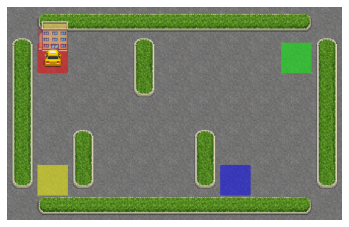

In [30]:
# từ q_table bắt đầu chơi thử
#q_table=np.load("q_table_qlearning.npy")
env = gnwrapper.Animation(gym.make("Taxi-v3"))
env.reset()

rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    

    for step in range(max_steps):
        print("****************************************************")
        print("EPISODE ", episode)
        
        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        time.sleep(0.5)
        clear_output(wait=True)
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
        
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

#Bài tập

1. Giải thích vì sao khi dùng Naive-Learning thì xe taxi chỉ đứng yên một chỗ?
2. Giải thích vì sao khi dùng Q-Leaning thì xe taxi có thể đón và trả khách được?
3. Tìm hiểu một game khác trên OpenAI và thiết lập cho agent chơi được